# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

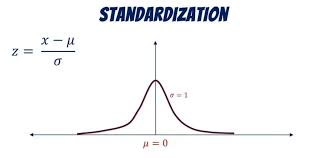


In [11]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://www.kaggle.com/datasets/stealthtechnologies/gdp-growth-of-african-countries
# https://drive.google.com/file/d/1KRb1vYv7DcDTK9d1mdzFyCbJuMYICYmc/view?usp=sharing

# Step 1: Load the dataset from Google Drive
file_id = "1KRb1vYv7DcDTK9d1mdzFyCbJuMYICYmc"
url = f"https://drive.google.com/uc?id={file_id}"
data = pd.read_csv(url)

numeric_data = data.fillna(0).values  # Replace NaN with 0 if any

# Standardize the data using NumPy only
data_mean = np.mean(numeric_data, axis=0)
data_std = np.std(numeric_data, axis=0)

# Prevent division by zero
data_std[data_std == 0] = 1

# Standardize: (X - mean) / std
standardized_data = (numeric_data - data_mean) / data_std

# Show first 5 standardized rows
print("\nStandardized Data Preview:")
print(standardized_data[:5])


Standardized Data Preview:
[[-1.70519568 -1.01800156 -0.82819294 -0.93575654 -0.84257979 -1.11860451
  -1.04604681 -1.31913707 -0.8040672  -1.00523004 -0.63810834 -1.05258027
  -0.69810215 -0.72900724 -1.05658135 -0.84442443 -1.39911009 -1.11325314
  -0.96134348 -1.01804241 -0.87268704 -0.92169289 -0.85740505 -0.9846317
  -0.97877888 -0.88663692 -0.83914377 -1.12272562 -0.93284004 -0.82536273
  -1.04058758 -0.78494085 -0.83448385 -1.01285695]
 [-1.65106248 -1.02182128 -0.82644185 -0.93535412 -0.83912057 -1.11057031
  -1.04321078 -1.30443675 -0.79963335 -1.00058882 -0.63608592 -1.04845069
  -0.69446962 -0.72895515 -1.05529373 -0.85002684 -1.39731444 -1.10737309
  -0.95512955 -1.01829685 -0.86442368 -0.92009215 -0.85657472 -0.97766577
  -0.97948674 -0.88242764 -0.83546991 -1.11939259 -0.92835245 -0.81680513
  -1.03749515 -0.78354309 -0.83631265 -1.00709155]
 [-1.59692929 -1.02755085 -0.82630011 -0.93491112 -0.83399929 -1.09851898
  -1.04016162 -1.30263159 -0.794489   -0.9988945  -0.6341

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [12]:
# Step 3: Calculate the Covariance Matrix
# Number of samples
n_samples = standardized_data.shape[0]

# Compute covariance matrix: (1 / (n-1)) * X^T * X
cov_matrix = (1 / (n_samples - 1)) * np.dot(standardized_data.T, standardized_data)

# Show the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[1.01587302 0.91676595 0.90012161 ... 0.85595832 0.85024826 0.83146391]
 [0.91676595 1.01587302 0.96584723 ... 0.94864614 0.9895836  0.86625959]
 [0.90012161 0.96584723 1.01587302 ... 0.9949253  0.97282374 0.91105865]
 ...
 [0.85595832 0.94864614 0.9949253  ... 1.01587302 0.9708682  0.9366027 ]
 [0.85024826 0.9895836  0.97282374 ... 0.9708682  1.01587302 0.88834098]
 [0.83146391 0.86625959 0.91105865 ... 0.9366027  0.88834098 1.01587302]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [13]:
# Step 4: Perform Eigendecomposition
# Use NumPy to compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display the eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Display the eigenvectors
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[3.18894955e+01 1.11569426e+00 3.94035711e-01 3.43553999e-01
 2.56308309e-01 1.42198886e-01 1.06975602e-01 5.99034450e-02
 4.65830679e-02 3.73218157e-02 3.22417046e-02 2.33054425e-02
 2.02374925e-02 1.40455452e-02 1.16952399e-02 9.46600025e-03
 7.28369706e-03 6.69252998e-03 4.04871057e-03 3.79549579e-03
 2.99456817e-03 2.60584165e-03 2.30533889e-03 1.53437824e-03
 7.32356378e-05 1.11159250e-04 1.09151991e-03 3.23471080e-04
 3.63702712e-04 4.25377599e-04 9.21629203e-04 5.72909700e-04
 7.06841204e-04 7.70067694e-04]

Eigenvectors:
[[-0.16390415  0.23652861 -0.26853421 ...  0.05435264  0.04775675
   0.00626071]
 [-0.1740726   0.13722243  0.13819895 ...  0.18546918 -0.12814651
   0.44113793]
 [-0.17658297 -0.06793378 -0.06741625 ...  0.1639344  -0.17393714
  -0.18240657]
 ...
 [-0.17412564 -0.15718276  0.02510072 ...  0.10862235 -0.22576944
  -0.04242354]
 [-0.17340172  0.01001099  0.26139669 ... -0.02125078 -0.0379184
  -0.02780776]
 [-0.16360502 -0.22412893  0.07482436 ... -

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [22]:
# Step 5: Sort Principal Components
# Get sorted indices of eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors using those indices
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)

print("\nCorresponding Sorted Eigenvectors:")
print(sorted_eigenvectors)

# Optional: Explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Sorted Eigenvalues:
[3.18894955e+01 1.11569426e+00 3.94035711e-01 3.43553999e-01
 2.56308309e-01 1.42198886e-01 1.06975602e-01 5.99034450e-02
 4.65830679e-02 3.73218157e-02 3.22417046e-02 2.33054425e-02
 2.02374925e-02 1.40455452e-02 1.16952399e-02 9.46600025e-03
 7.28369706e-03 6.69252998e-03 4.04871057e-03 3.79549579e-03
 2.99456817e-03 2.60584165e-03 2.30533889e-03 1.53437824e-03
 1.09151991e-03 9.21629203e-04 7.70067694e-04 7.06841204e-04
 5.72909700e-04 4.25377599e-04 3.63702712e-04 3.23471080e-04
 1.11159250e-04 7.32356378e-05]

Corresponding Sorted Eigenvectors:
[[-0.16390415  0.23652861 -0.26853421 ... -0.13202475 -0.03566081
   0.0250724 ]
 [-0.1740726   0.13722243  0.13819895 ... -0.1834193  -0.17419421
   0.04157824]
 [-0.17658297 -0.06793378 -0.06741625 ...  0.02439688  0.33707922
   0.34460953]
 ...
 [-0.17412564 -0.15718276  0.02510072 ...  0.29917664  0.01027183
  -0.04035268]
 [-0.17340172  0.01001099  0.26139669 ... -0.05138919 -0.00040986
  -0.04430532]
 [-0.16360502 

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [21]:
# Step 6: Project Data onto Principal Components

num_components = 2
top_eigenvectors = sorted_eigenvectors[:, :num_components]
reduced_data = standardized_data @ top_eigenvectors
reduced_data[:5]


array([[ 5.64766768, -0.90698721],
       [ 5.62079531, -0.89324774],
       [ 5.58869277, -0.88262618],
       [ 5.54853887, -0.87056278],
       [ 5.49848296, -0.85627609]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [20]:
# Step 7: Output the Reduced Data

print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print(reduced_data[:5])  # Display the first few rows of reduced data

Reduced Data Shape: (64, 2)
[[ 5.64766768 -0.90698721]
 [ 5.62079531 -0.89324774]
 [ 5.58869277 -0.88262618]
 [ 5.54853887 -0.87056278]
 [ 5.49848296 -0.85627609]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

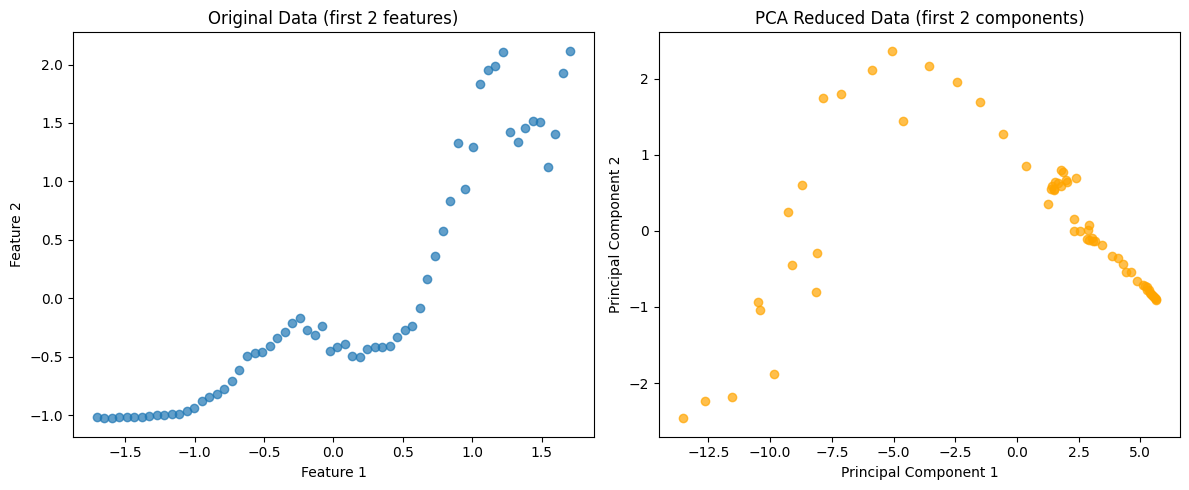

In [19]:
# Step 8: Visualize Before and After PCA

# Plot original data (first two features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.7)
plt.title('Original Data (first 2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot reduced data (first two principal components)
plt.subplot(1, 2, 2)

# If reduced_data has at least 2 components
if reduced_data.shape[1] >= 2:
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, color='orange')
    plt.title('PCA Reduced Data (first 2 components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    plt.text(0.5, 0.5, 'Reduced data has less than 2 components',
             horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()